# Data Analysis Report Project - Student Result Analysis

## 1. Introduction
### This report aims to analyze the student scores dataset to uncover patterns and insights that can help in understanding the factors affecting student performance in Math, Reading, and Writing.

# 2. Data Dictionary (column description)
### 1. Gender: Gender of the student (male/female)
### 2. EthnicGroup: Ethnic group of the student (group A to E)
### 3. ParentEduc: Parent(s) education background (from some_highschool to master's degree)
### 4. LunchType: School lunch type (standard or free/reduced)
### 5. TestPrep: Test preparation course followed (completed or none)
### 6. ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
### 7. PracticeSport: How often the student parctice sport (never/sometimes/regularly)
### 8. IsFirstChild: If the child is first child in the family or not (yes/no)
### 9. NrSiblings: Number of siblings the student has (0 to 7)
### 10. TransportMeans: Means of transport to school (schoolbus/private)
### 11. WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
### 12. MathScore: math test score(0-100)
### 13. ReadingScore: reading test score(0-100)
### 14. WritingScore: writing test score(0-100)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Understanding

### 3.1 Printing the top 5 values of the data

In [18]:
df= pd.read_csv("examscores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

### 3.2 Descriptive Statistics of the data 

In [19]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### 3.3 Calculating the null values in the exam scores data

In [48]:
df.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

### Handling Missing Values

In [50]:
# Handle missing values (full treatment)
missing_fill = {
    'EthnicGroup': df['EthnicGroup'].mode()[0] if 'EthnicGroup' in df.columns else None,
    'TestPrep': df['TestPrep'].mode()[0] if 'TestPrep' in df.columns else None,
    'TransportMeans': df['TransportMeans'].mode()[0] if 'TransportMeans' in df.columns else None,
    'NrSiblings': df['NrSiblings'].median() if 'NrSiblings' in df.columns else None,
    'ParentEduc': df['ParentEduc'].mode()[0] if 'ParentEduc' in df.columns else None,
    'WklyStudyHours': df['WklyStudyHours'].mode()[0] if 'WklyStudyHours' in df.columns else None,
    'PracticeSport': df['PracticeSport'].mode()[0] if 'PracticeSport' in df.columns else None,
    'ParentMaritalStatus': df['ParentMaritalStatus'].mode()[0] if 'ParentMaritalStatus' in df.columns else None,
    'IsFirstChild': df['IsFirstChild'].mode()[0] if 'IsFirstChild' in df.columns else None
}
# Clean up any None values from missing columns
missing_fill = {k: v for k, v in missing_fill.items() if v is not None}
df.fillna(missing_fill, inplace=True)


# 4. Data Cleaning

### 4.1 Drop Unnamed Column

In [23]:
df= df.drop("Unnamed: 0",axis =1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female     group C   bachelor's degree      standard     none   
1  female     group C        some college      standard     none   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0     school_bus   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0     school_bus   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# 5. Data Transformation

### 5.1 change Weekly study hours column 

In [24]:
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("05-Oct","5 - 10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# 6. Exploratory Data Analysis

### 6.1 Gender Distribution

C:\Users\asmika\AppData\Local\Temp\ipykernel_8636\1595413645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data= df, x="Gender",palette="Set2",saturation=2,edgecolor = "black")


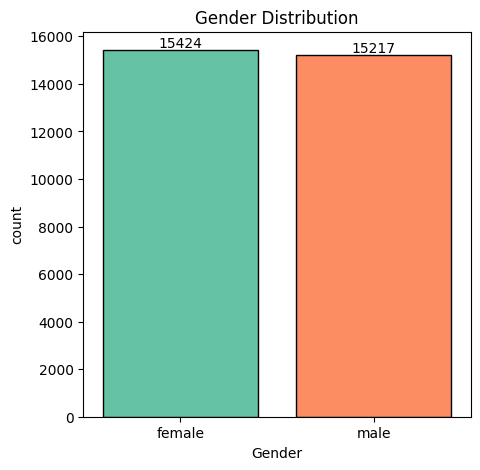

In [25]:
plt.figure(figsize=(5,5))
ax= sns.countplot(data= df, x="Gender",palette="Set2",saturation=2,edgecolor = "black")
plt.title("Gender Distribution")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### from the above chart we have analysed that:the number of females in the data is more than the number of males 

### 6.2 Relationship Comparison between Gender and Students Score 

In [26]:
gb2=df.groupby("Gender").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":"mean"})
print(gb2)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


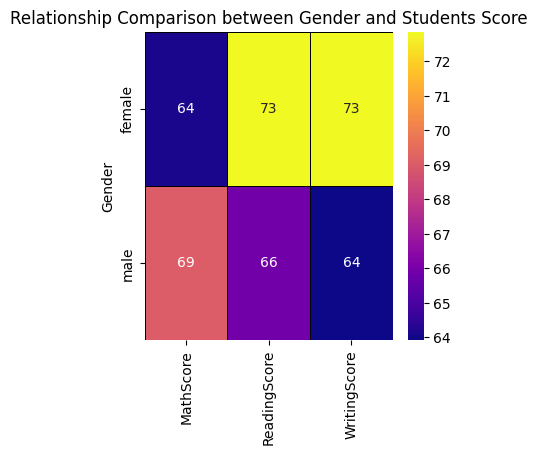

In [27]:
plt.figure(figsize=(4,4))
plt.title("Relationship Comparison between Gender and Students Score")
sns.heatmap(gb2, annot=True,cmap="plasma",linewidths=0.5, linecolor='black',cbar=True)
plt.show()

### from the above chart we have concluded that males have obtained more marks in Maths comparatively to females and females have obtained more marks in Reading and Writing Scores compared to males

### 6.3 Relationship between Parents Education and Students Score

In [28]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.445978     69.189667     68.456711
some high school    62.584013     65.510785     63.632409


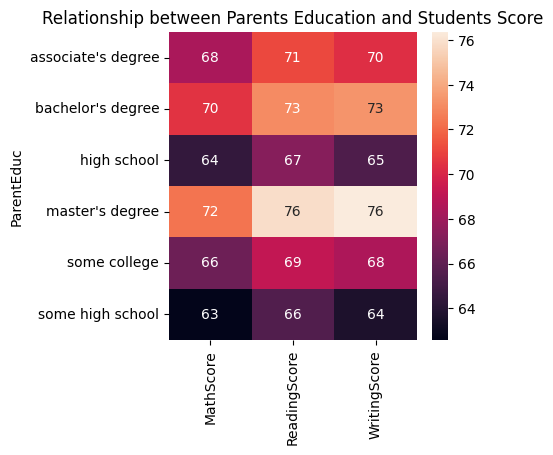

In [29]:
plt.figure(figsize=(4,4))
plt.title("Relationship between Parents Education and Students Score")
sns.heatmap(gb, annot=True)
plt.show()


### from the above chart we have concluded that the education of the parents have a good impact on their scores

### 6.4 Relationship between Parents Marital Status and Students Score

In [30]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.650161     69.379561     68.406177
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


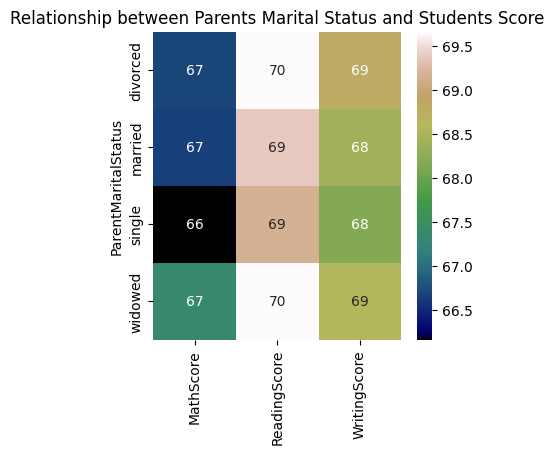

In [31]:
plt.figure(figsize=(4,4))
plt.title("Relationship between Parents Marital Status and Students Score")
sns.heatmap(gb1, annot=True,cmap='gist_earth')
plt.show()

### from the above chart we have concluded there is no/negligible impact on the scores of the students based on their marital status

### 6.5 Distribution of Scores
#### 6.5.1 Calculated the Frequency of Math Scores

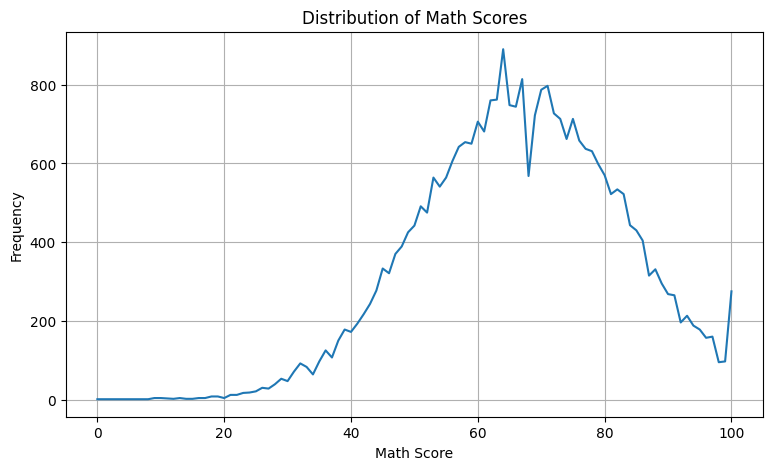

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

math_score_counts = df['MathScore'].value_counts().sort_index()
# Create a line plot for MathScore
plt.figure(figsize=(9,5))
sns.lineplot(x=math_score_counts.index, y=math_score_counts.values)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### 6.5.2 Calculated the Frequency of Reading Scores

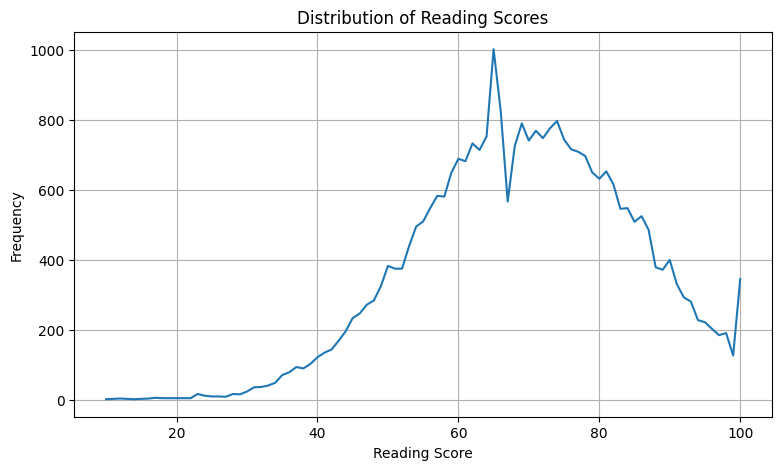

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'ReadingScore' is the column name for reading scores
reading_score_counts = df['ReadingScore'].value_counts().sort_index()

# Create a line plot for ReadingScore
plt.figure(figsize=(9, 5))
sns.lineplot(x=reading_score_counts.index, y=reading_score_counts.values)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### 6.5.3 Calculated the Frequency of Writing Scores

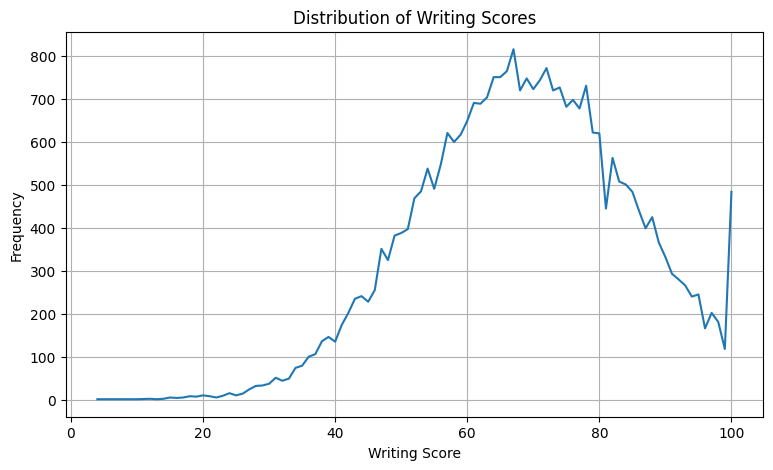

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'WritingScore' is the column name for writing scores
writing_score_counts = df['WritingScore'].value_counts().sort_index()

# Create a line plot for WritingScore
plt.figure(figsize=(9, 5))
sns.lineplot(x=writing_score_counts.index, y=writing_score_counts.values)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### from the above 3 Scores Line Graphs we can conclude that the students are basically weak in Maths than the 2 rest of subjects

### 6.6. Distribution of Ethinic Groups

In [35]:
print(df["EthnicGroup"].unique())

['group C' 'group B' 'group A' 'group D' 'group E']


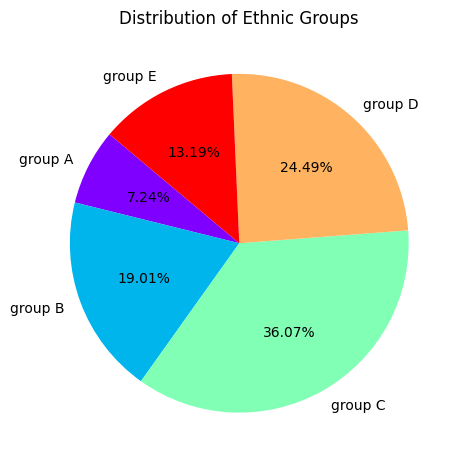

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate counts for each ethnic group
groupA = df.loc[df['EthnicGroup'] == "group A"].count()
groupB = df.loc[df['EthnicGroup'] == "group B"].count()
groupC = df.loc[df['EthnicGroup'] == "group C"].count()
groupD = df.loc[df['EthnicGroup'] == "group D"].count()
groupE = df.loc[df['EthnicGroup'] == "group E"].count()

# Labels and data for the pie chart
labels = ["group A", "group B", "group C", "group D", "group E"]
sizes = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

# Define colors and explode
colors = plt.get_cmap('rainbow')(np.linspace(0, 1, len(labels)))

# Create pie chart
plt.figure(figsize=(5.5,5.5))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=140, colors=colors)
plt.title("Distribution of Ethnic Groups")

# Show plot
plt.show()


### from this we can conclude that Group C has the most distribution among the Ethnic Groups with a percentage of 31.98%

### 6.7.1. Distribution of Scores of Students according to Weakly Study Hours 

In [37]:
gb4=df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":"mean"})
gb4['AllScoresMean'] = (gb4['MathScore'] + gb4['ReadingScore'] + gb4['WritingScore']) / 3
print(gb4)

                MathScore  ReadingScore  WritingScore  AllScoresMean
WklyStudyHours                                                      
5 - 10          66.859078     69.654148     68.643800      68.385675
< 5             64.580359     68.176135     67.090192      66.615562
> 10            68.696655     70.365436     69.777778      69.613290


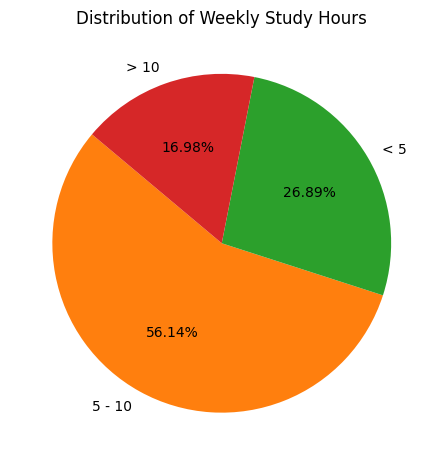

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate counts for each category of weekly study hours
study_hours_counts = df['WklyStudyHours'].value_counts()

# Labels and data for the pie chart
labels = study_hours_counts.index.tolist()
sizes = study_hours_counts.values.tolist()

# Define colors
colors = ['tab:orange', 'tab:green', 'tab:red']

# Create pie chart
plt.figure(figsize=(5.5,5.5))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=140, colors=colors)
plt.title("Distribution of Weekly Study Hours")

# Show plot
plt.show()


### from this we can conclude that Student's study upto maximum 5 - 10 hours of study with the  maximum percentage of 54.73% 

### 6.7.2. Relationship between Weakly Study Hours studied by student and Students Scores

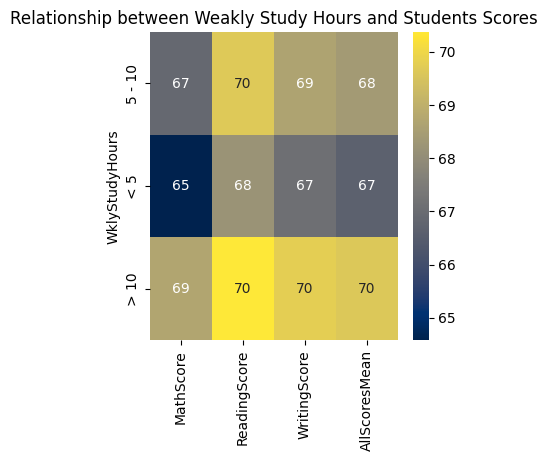

In [39]:
plt.figure(figsize=(4,4))
plt.title("Relationship between Weakly Study Hours and Students Scores")
sns.heatmap(gb4, annot=True,cmap='cividis')
plt.show()

### from this we can conclude that Student's who study more than 10 hours have more overall marks average of 70 than 5-10 hours with overall average of 68 and less than 5 hours with overall average of 67 respectively

### 6.8. Relationship between Test Preparation and Students Scores

In [40]:
gb5=df.groupby("TestPrep").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":"mean"})
print(gb5)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed  69.546660     73.732998     74.703265
none       65.120323     67.281495     65.394180


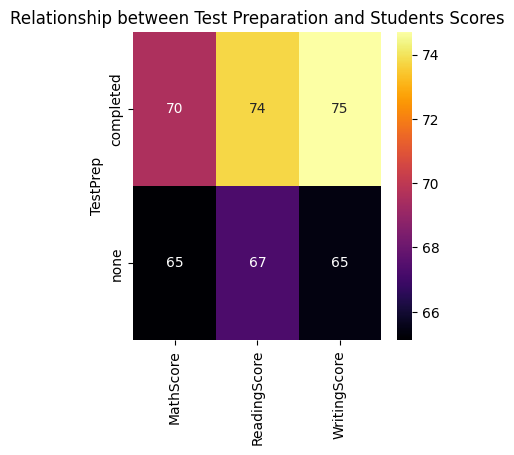

In [41]:
plt.figure(figsize=(4,4))
plt.title("Relationship between Test Preparation and Students Scores")
sns.heatmap(gb5, annot=True,cmap='inferno')
plt.show()

### from this we can conclude that the Students those who have completed their Test Preparation have more mean marks in all the subjects comparatively to those haven't done any preparation

### 6.9. Relationship between Lunch Type and Student Scores

In [42]:
gb3=df.groupby("LunchType").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":"mean"}).reset_index()
print(gb3)

      LunchType  MathScore  ReadingScore  WritingScore
0  free/reduced  58.862332     64.189735     62.650522
1      standard  70.709370     72.175634     71.529716


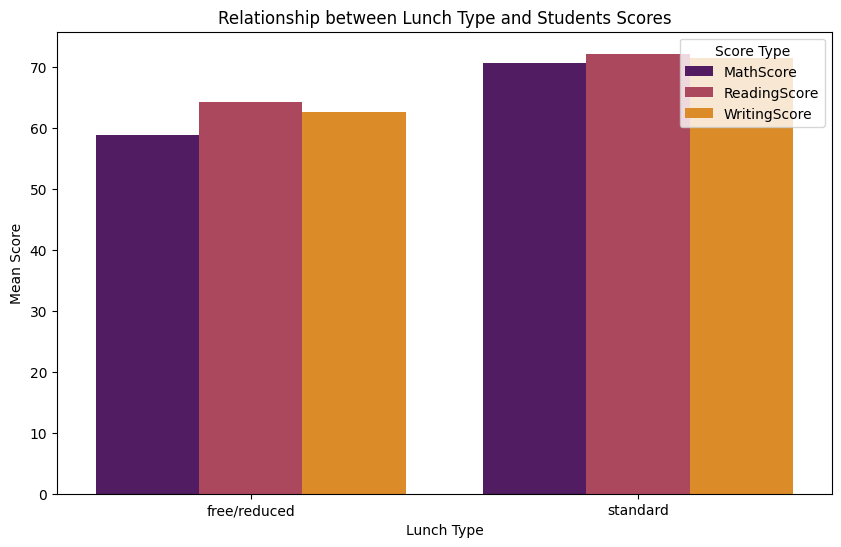

In [43]:
# Reshape data for plotting as a bar graph
gb3_melted = pd.melt(gb3, id_vars=['LunchType'], value_vars=['MathScore', 'ReadingScore', 'WritingScore'],
                     var_name='ScoreType', value_name='MeanScore')
# Plotting as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='LunchType', y='MeanScore', hue='ScoreType', data=gb3_melted, palette='inferno')
plt.title("Relationship between Lunch Type and Students Scores")
plt.xlabel("Lunch Type")
plt.ylabel("Mean Score")
plt.legend(title='Score Type', loc='upper right')
plt.show()

### from this we can conclude that the Students those who have Standard Lunch have more mean marks in all the subjects comparatively to those have free or reduced food

### 6.10. Relationship between Practicing Sport and Student Scores

In [44]:
gb6=df.groupby("PracticeSport").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":"mean"})
print(gb6)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.289258     69.255112     68.090255


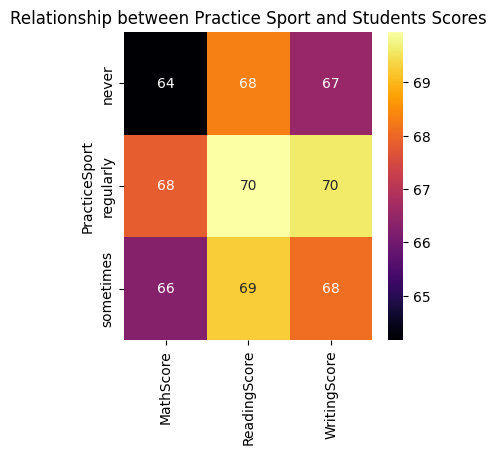

In [45]:
plt.figure(figsize=(4,4))
plt.title("Relationship between Practice Sport and Students Scores")
sns.heatmap(gb6, annot=True,cmap='inferno')
plt.show()

### from the above chart we can conclude that the students that Practice sports regularly and even sometimes remain fresh and active and hence their scores gradually increase comparative to those students who never Practice sports

Key Findings:

1. Distribution of Ethnic Groups:
The pie chart for ethnic groups showed that the population of students is distributed across five ethnic groups, with each group making up a significant portion of the sample.

2. Relationship between Weekly Study Hours and Scores:
The heatmap revealed a positive correlation between weekly study hours and student scores in Math, Reading, and Writing. More study hours tend to correlate with higher scores in all three subjects.

3. Relationship between Parent Education and Student Scores:
The heatmap for parent education indicated that higher parent education levels are associated with higher student scores in Math, Reading, and Writing. Specifically, students with parents having a master's degree scored the highest on average.

4. Practice Sport and Student Scores:
The analysis showed that students who practice sports regularly tend to have slightly higher scores compared to those who never practice sports. However, the differences were not very pronounced.

5. Lunch Type and Student Scores:
Students who receive standard lunches tend to have higher average scores compared to those who receive free/reduced lunches.

6. Number of Siblings and Student Scores:
There is a slight negative correlation between the number of siblings and student scores. Students with more siblings tend to have slightly lower scores on average.

Conclusions:

Based on the analysis of the student scores dataset, several key insights can be drawn:

1. Parental Influence:
The educational background of parents plays a significant role in student performance. Higher levels of parental education are associated with better student outcomes across all subjects.

2. Study Habits:
Regular study habits are crucial for achieving higher scores. Students who dedicate more hours to studying each week tend to perform better in Math, Reading, and Writing.

3. Practice Sports:
Engaging in sports appears to have a positive impact on student performance, albeit modest. Students who practice sports regularly tend to score slightly higher than their peers who do not engage in sports.

4. Socioeconomic Factors:
Socioeconomic status, as indicated by lunch type, influences student performance. Students who have access to standard lunches generally perform better than those who receive free/reduced lunches.

5. Family Size:
There is a slight negative impact of having more siblings on student performance. This may be due to resource dilution or less individual attention.

Recommendations:

1. Encourage Parental Involvement:
Schools and educators should encourage parental involvement and provide resources to help parents support their children's education.

2. Promote Regular Study Habits:
Implement programs and workshops to help students develop effective study habits and time management skills.

3. Support Physical Activity:
Schools should provide ample opportunities for students to engage in sports and physical activities, as it has a positive impact on overall student well-being and performance.

4. Address Socioeconomic Disparities:
Implement initiatives to support students from lower socioeconomic backgrounds, ensuring they have access to necessary resources and support systems.

5. Tailored Support for Larger Families:
Provide additional support and resources to students from larger families to ensure they receive adequate attention and resources for their education.

<!-- Conclusion
Based on the analysis of the student scores dataset, several key insights can be drawn:

Parental Influence:

The educational background of parents plays a significant role in student performance. Higher levels of parental education are associated with better student outcomes across all subjects.
Study Habits:

Regular study habits are crucial for achieving higher scores. Students who dedicate more hours to studying each week tend to perform better in Math, Reading, and Writing.
Practice Sports:

Engaging in sports appears to have a positive impact on student performance, albeit modest. Students who practice sports regularly tend to score slightly higher than their peers who do not engage in sports.
Socioeconomic Factors:

Socioeconomic status, as indicated by lunch type, influences student performance. Students who have access to standard lunches generally perform better than those who receive free/reduced lunches.
Family Size:

There is a slight negative impact of having more siblings on student performance. This may be due to resource dilution or less individual attention.
Recommendations
Encourage Parental Involvement:

Schools and educators should encourage parental involvement and provide resources to help parents support their children's education.
Promote Regular Study Habits:

Implement programs and workshops to help students develop effective study habits and time management skills.
Support Physical Activity:

Schools should provide ample opportunities for students to engage in sports and physical activities, as it has a positive impact on overall student well-being and performance.
Address Socioeconomic Disparities:

Implement initiatives to support students from lower socioeconomic backgrounds, ensuring they have access to necessary resources and support systems.
Tailored Support for Larger Families:

Provide additional support and resources to students from larger families to ensure they receive adequate attention and resources for their education. -->